In [1]:
%load_ext autoreload
%autoreload 2

import warnings
# For ignoring warnings printed by R magic commands
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

In [2]:
%%R
# Load R libraries
require(stringr)
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)
library(tidyverse)
library(glue)
library(dplyr)

# Install the ggthemes package (you have to do it only once)
install.packages("ggthemes", repos = "http://cran.us.r-project.org")
install.packages("plotrix", repos = "http://cran.us.r-project.org")
install.packages("wesanderson")
devtools::install_github("karthik/wesanderson")
library(ggthemes)
library(plotrix)
library(wesanderson)
library(gridExtra)

R[write to console]: Loading required package: stringr



R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: data.table

R[write to console]: Loading required package: Hmisc

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: Formula

R[write to console]: 
Attaching package: ‘Hmisc’


R[write to console]: The following objects are masked from ‘package:base’:

    format.pval, units


R[write to console]: Loading required package: ggthemes

R[write to console]: Loading required package: gridExtra

R[write to console]: Loading required package: grid

R[write to console]: Loading required package: scales

R[write to console]: Loading required package: RColorBrewer

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.0.0     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ forcats 


Error in contrib.url(repos, type) : 
  trying to use CRAN without setting a mirror
Calls: <Anonymous> ... withVisible -> install.packages -> startsWith -> contrib.url


In [3]:
import os
import random

import pandas as pd

# E2E Pareto Plots

## Load Top-Level Dataframes

In [4]:
# load top-level dataframes
top_level_path = "csv/top-level-dataframes"

cic_iomt_2024_df = pd.read_csv(os.path.join(top_level_path, "cic_iomt_2024_df.csv"))
cic_iot_2023_df = pd.read_csv(os.path.join(top_level_path, "cic_iot_2023_df.csv"))
iscxvpn2016_df = pd.read_csv(os.path.join(top_level_path, "iscxvpn2016_df.csv"))
ucsbfinetuning_df = pd.read_csv(os.path.join(top_level_path, "ucsbfinetuning_df.csv"))
cic_iot_2023_32_df = pd.read_csv(os.path.join(top_level_path, "cic_iot_2023_32_df.csv"))
cic_ids_2017_df = pd.read_csv(os.path.join(top_level_path, "cic_ids_2017_df.csv"))
cic_ids_2018_df = pd.read_csv(os.path.join(top_level_path, "cic_ids_2018_df.csv"))

## Load E2E Dataframes

In [5]:
e2e_pareto_path = "csv/e2e-pareto-dataframes"

pareto_cic_iomt_2024_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_iomt_2024_df.csv"))
pareto_cic_iot_2023_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_iot_2023_df.csv"))
pareto_iscxvpn2016_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_iscxvpn2016_df.csv"))
pareto_ucsbfinetuning_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_ucsbfinetuning_df.csv"))
pareto_cic_iot_2023_32_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_iot_2023_32_df.csv"))
pareto_cic_ids_2017_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_ids_2017_df.csv"))
pareto_cic_ids_2018_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_ids_2018_df.csv"))

## Pareto Plots

In [6]:
%%R
create_pareto_plot <- function(
    pareto_df, 
    line_size=1,
    point_size=2,
    x_label="#Flows", 
    y_label="F1 Score",
    y_title=element_blank(),
    tag, 
    # x_breaks=seq(from=0, to=1000000, length.out=4),
    x_breaks=c(0, 100000, 500000, 1000000),
    y_breaks,
    y_limits,
    legend_position="none"
    ) {

    blues = brewer.pal(n = 9, "Blues")[5:9]
    reds = brewer.pal(n = 9, "Reds")[4:8]

    pareto_color_palette <- c(reds[4], reds[1], blues[3])
    new_legend_labels <- c("NB", "Leo", "SpliDT")

    # Reorder 'name' column to order netbeacon -> leo -> cap
    pareto_df$name <- factor(pareto_df$name, levels = c("netbeacon", "leo", "cap"))

    pareto_plot <- ggplot(pareto_df, aes(x=num_flows, y=f1_score, color=name)) +
                          geom_line(size=line_size) +
                          geom_point(size=point_size) +
                          labs(x = x_label, y = y_label, tag = tag) +
                          scale_x_continuous(breaks=x_breaks, labels = label_number_si()) +
                          scale_y_continuous(breaks=y_breaks, labels = scales::number_format(accuracy = 0.01)) +
                          coord_cartesian(ylim = y_limits) +
                          theme_hc(base_size = 22) +
                          theme(axis.ticks = element_line(color = "black"), # Ensure ticks are visible
                                axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
                                plot.title = element_text(hjust = 0.5),
                                axis.text.x=element_text(colour="black", size=16),
                                axis.text.y=element_text(colour="black", size=16),
                                axis.title.x=element_text(colour="black", size=18),
                                axis.title.y=y_title,
                                legend.text=element_text(size=16),
                                plot.tag=element_text(colour="black", size=18, angle=0,
                                                      margin=margin(t=-10, r=0, b=0, l=0, unit="pt"),
                                                      vjust=2.0),
                                plot.tag.position = "top") +
                          guides(fill=guide_legend(ncol=1, bycol=TRUE, title=NULL), linetype=FALSE) +
                          theme(plot.margin = margin(0.6, 0.25, 0.1, 0.25, "cm"),
                                legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
                                legend.key.width = unit(0.4, "lines"),
                                legend.key.height = unit(0.4, "lines"),
                                legend.spacing.x = unit(0.05, "cm"),
                                legend.spacing.y = unit(0.05, "cm"),
                                legend.title = element_blank(), 
                                legend.position = legend_position, 
                                legend.justification = c(0, 1)) +
                          scale_color_manual(values = pareto_color_palette, labels = new_legend_labels)
                                
    return (pareto_plot)
}

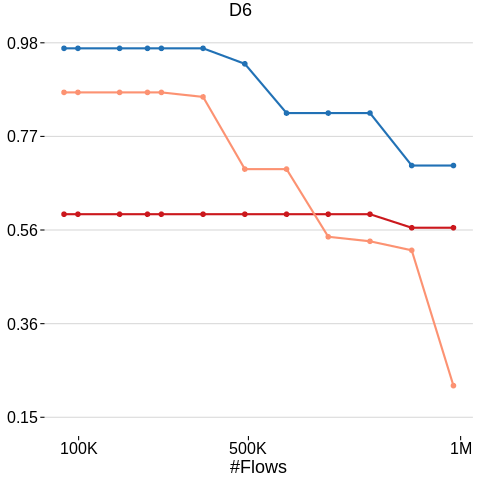

In [7]:
%%R -i pareto_cic_ids_2017_df
pareto_cic_ids_2017_plot <- create_pareto_plot(
    pareto_df=pareto_cic_ids_2017_df, 
    tag="D6", 
    y_breaks=seq(from=0.15, to=0.98, length.out=5),
    y_limits=c(0.15, 0.98)
)
pareto_cic_ids_2017_plot

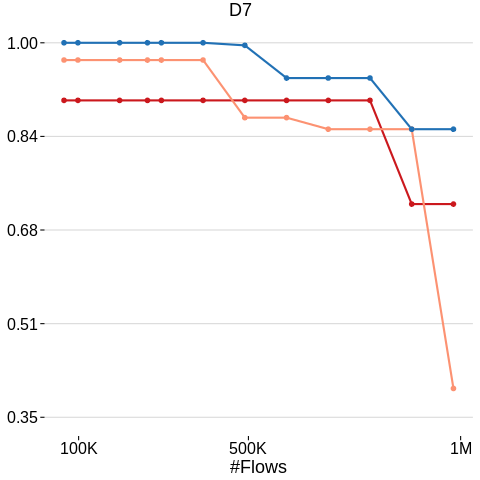

In [8]:
%%R -i pareto_cic_ids_2018_df
pareto_cic_ids_2018_plot <- create_pareto_plot(
    pareto_df=pareto_cic_ids_2018_df, 
    tag="D7", 
    y_breaks=seq(from=0.35, to=1.0, length.out=5),
    y_limits=c(0.35, 1.0)
)
pareto_cic_ids_2018_plot

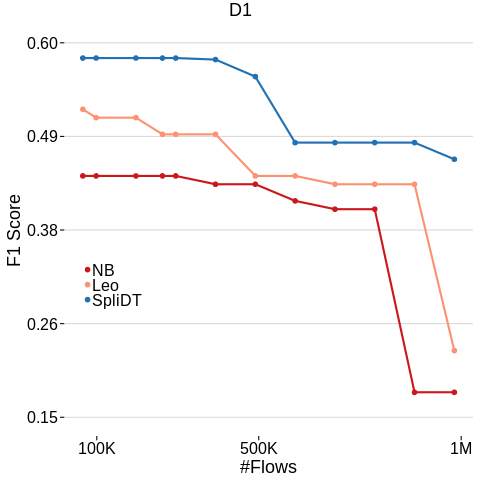

In [9]:
%%R -i pareto_cic_iomt_2024_df
pareto_cic_iomt_2024_plot <- create_pareto_plot(
    pareto_df=pareto_cic_iomt_2024_df, 
    tag="D1", 
    y_title=element_text(colour="black", size=18),
    y_breaks=seq(from=0.15, to=0.60, length.out=5),
    y_limits=c(0.15, 0.60),
    legend_position=c(0.05, 0.4)
)
pareto_cic_iomt_2024_plot

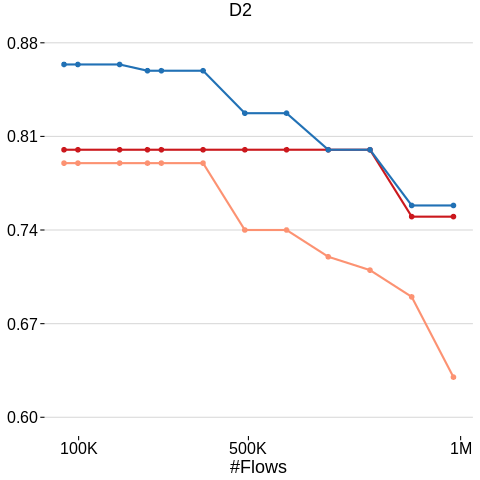

In [10]:
%%R -i pareto_cic_iot_2023_df
pareto_cic_iot_2023_plot <- create_pareto_plot(
    pareto_df=pareto_cic_iot_2023_df, 
    tag="D2", 
    y_breaks=seq(from=0.6, to=0.88, length.out=5),
    y_limits=c(0.6, 0.88)
)
pareto_cic_iot_2023_plot

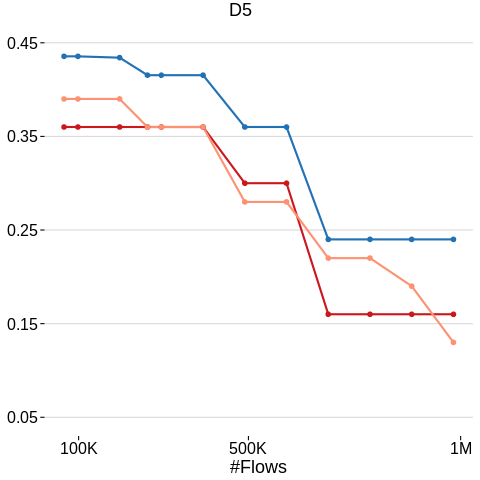

In [11]:
%%R -i pareto_cic_iot_2023_32_df
pareto_cic_iot_2023_32_plot <- create_pareto_plot(
    pareto_df=pareto_cic_iot_2023_32_df, 
    tag="D5", 
    y_breaks=seq(from=0.05, to=0.45, length.out=5),
    y_limits=c(0.05, 0.45)
)
pareto_cic_iot_2023_32_plot

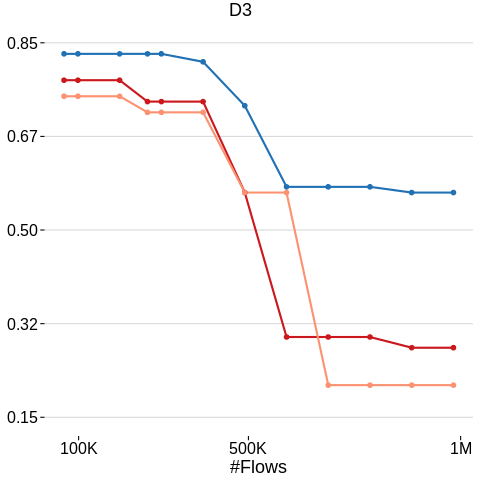

In [12]:
%%R -i pareto_iscxvpn2016_df
pareto_iscxvpn2016_plot <- create_pareto_plot(
    pareto_df=pareto_iscxvpn2016_df, 
    tag="D3", 
    y_breaks=seq(from=0.15, to=0.85, length.out=5),
    y_limits=c(0.15, 0.85)
)
pareto_iscxvpn2016_plot

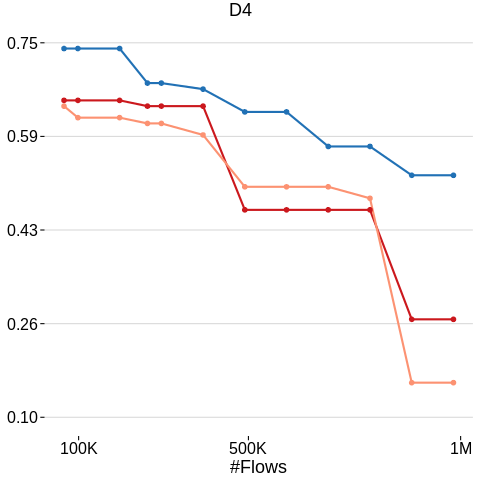

In [13]:
%%R -i pareto_ucsbfinetuning_df
pareto_ucsbfinetuning_plot <- create_pareto_plot(
    pareto_df=pareto_ucsbfinetuning_df, 
    tag="D4", 
    y_breaks=seq(from=0.10, to=0.75, length.out=5),
    y_limits=c(0.10, 0.75)
)
pareto_ucsbfinetuning_plot

In [14]:
%%R
# save the ggplot with a tight layout around all the components
combined_pareto_plots <- grid.arrange(
    pareto_cic_iomt_2024_plot,
    pareto_cic_iot_2023_plot,
    pareto_iscxvpn2016_plot,
    pareto_ucsbfinetuning_plot,
    pareto_cic_iot_2023_32_plot,
    pareto_cic_ids_2017_plot,
    pareto_cic_ids_2018_plot,
    nrow=1
)
ggsave(
    combined_pareto_plots, 
    width=17.8, height=2.5, # 18.0, 2.5
    file="/home/jovyan/work/plots/generated/pareto.pdf"
)

R[write to console]: Error in grDevices::pdf(file = filename, ..., version = version) : 
  cannot open file '/home/jovyan/work/plots/generated/pareto.pdf'
Calls: <Anonymous> ... <Anonymous> -> withVisible -> ggsave -> dev -> <Anonymous>




Error in grDevices::pdf(file = filename, ..., version = version) : 
  cannot open file '/home/jovyan/work/plots/generated/pareto.pdf'
Calls: <Anonymous> ... <Anonymous> -> withVisible -> ggsave -> dev -> <Anonymous>


# Time to Accuracy

In [15]:
tta_path = "csv/tta-dataframes"

tta_accuracies_df = pd.read_csv(os.path.join(tta_path, "tta_accuracies_df.csv"))
tta_breakdown_df = pd.read_csv(os.path.join(tta_path, "tta_breakdown_df.csv"))

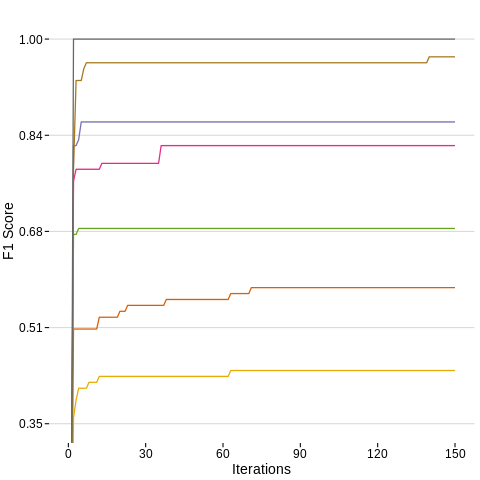

In [16]:
%%R -i tta_accuracies_df

# color_palette = brewer.pal(n = 9, "Set1") #[1:7]
# tta_color_palette = c(
#     color_palette[1], color_palette[2], color_palette[4], color_palette[5], color_palette[7], color_palette[8], color_palette[9]
#     )
tta_color_palette = brewer.pal(n = 9, "Dark2")[2:9]

datasets_order <- c("D1", "D2", "D3", "D4", "D5", "D6", "D7")

tta_plot <- ggplot(tta_accuracies_df, aes(x=iteration, y=accuracy, color=dataset)) +
                   geom_line(size=0.6) +
                   labs(x = "Iterations", y = "F1 Score") +
                   scale_x_continuous(
                     #   breaks=seq(from=0, to=145, length.out=4),
                       breaks=c(0, 30, 60, 90, 120, 150),
                       limit=c(0, 150), 
                       labels = label_number_si()
                     ) +
                   scale_y_continuous(
                       breaks=seq(from=0.35, to=1.0, length.out=5), 
                       labels = scales::number_format(accuracy = 0.01)
                   ) +
                   coord_cartesian(ylim = c(0.35, 1.0)) +
                   theme_hc(base_size = 22) +
                   theme(axis.ticks = element_line(color = "black"), # Ensure ticks are visible
                       axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
                       plot.title = element_text(hjust = 0.5),
                       axis.text.x=element_text(colour="black", size=12),
                       axis.text.y=element_text(colour="black", size=12),
                       axis.title.x=element_text(colour="black", size=14),
                       axis.title.y=element_text(colour="black", size=14),
                       legend.text=element_text(size=12),
                       plot.tag=element_text(colour="black", size=14),
                       plot.tag.position = "bottom") +
                   guides(color=guide_legend(nrow=1, byrow=TRUE, title=NULL), linetype=FALSE) +
                   theme(plot.margin = margin(0.7, 0.2, 0.1, 0.1, "cm"),
                     legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
                     # Adjust the size of the legend keys (boxes)
                     legend.key.width = unit(0.4, "lines"),
                     legend.key.height = unit(0.4, "lines"),
                     legend.spacing.x = unit(0.05, "cm"),
                     legend.spacing.y = unit(0.05, "cm"),
                     legend.text=element_text(colour="black", size=12),
                     legend.title = element_blank(), 
                     legend.position = c(0.20, 1.08), 
                     legend.justification = c(0, 1)) +
                   scale_color_manual(values = tta_color_palette, labels = datasets_order)
                                
tta_plot

In [17]:
%%R
# save the ggplot with a tight layout around all the components
ggsave(tta_plot, width=5.0, height=1.8, file="/home/jovyan/work/plots/generated/tta-series.pdf")

R[write to console]: Error in grDevices::pdf(file = filename, ..., version = version) : 
  cannot open file '/home/jovyan/work/plots/generated/tta-series.pdf'
Calls: <Anonymous> ... <Anonymous> -> withVisible -> ggsave -> dev -> <Anonymous>

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In brewer.pal(n = 9, "Dark2") :
R[write to console]: 
 
R[write to console]:  n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors


R[write to console]: 2: Removed 70 row(s) containing missing values (geom_path). 




Error in grDevices::pdf(file = filename, ..., version = version) : 
  cannot open file '/home/jovyan/work/plots/generated/tta-series.pdf'
Calls: <Anonymous> ... <Anonymous> -> withVisible -> ggsave -> dev -> <Anonymous>


# TCAM Rulegen Timings

In [18]:
bm_tcam_rulegen_path = "csv/bm-tcam-rulegen-timings"

tcam_rulegen_timings_df = pd.read_csv(os.path.join(bm_tcam_rulegen_path, "tcam_rulegen_timings.csv"))
# get the 'value' column as a list
tcam_rulegen_timings = tcam_rulegen_timings_df['values'].tolist()

In [19]:
# randomly pick 80% of the data list above
random_1_data = random.sample(tcam_rulegen_timings, int(0.1*len(tcam_rulegen_timings)))
random_2_data = random.sample(tcam_rulegen_timings, int(0.2*len(tcam_rulegen_timings)))
random_4_data = random.sample(tcam_rulegen_timings, int(0.8*len(tcam_rulegen_timings)))
random_6_data = random.sample(tcam_rulegen_timings, int(0.8*len(tcam_rulegen_timings)))
random_8_data = random.sample(tcam_rulegen_timings, int(0.8*len(tcam_rulegen_timings)))
random_9_data = random.sample(tcam_rulegen_timings, int(0.9*len(tcam_rulegen_timings)))

print("Rulegen Timings")
# print(sum(random_4_data))
# print(sum(random_6_data))
print(sum(random_8_data))
print(sum(random_9_data))
print(sum(tcam_rulegen_timings))
print(sum(tcam_rulegen_timings+random_1_data))
print(sum(tcam_rulegen_timings+random_2_data))

Rulegen Timings
0.7232069969177246
0.8130273818969727
0.9074795246124268
0.9960775375366211
1.0752084255218506


# Prediction Latency

In [20]:
# all in microseconds

cic_iomt_2024_flow_duration_avg = 100251218.05
cic_iomt_2024_flow_duration_std = 32788593.17
cic_iomt_2024_max_phase_distribution = {16: 0.31, 32: 0.48, 64: 0.21, 128: 0.0, 256: 0.0, 512: 0.0, 1024: 0.0, 2048: 0.0, 4096: 0.0}

cic_iot_2023_flow_duration_avg = 47232195.12
cic_iot_2023_flow_duration_std = 44175535.68
cic_iot_2023_max_phase_distribution = {16: 0.38, 32: 0.46, 64: 0.11, 128: 0.03, 256: 0.01, 512: 0.01, 1024: 0.0, 2048: 0.0, 4096: 0.0}

iscxvpn2016_flow_duration_avg = 69348435.99
iscxvpn2016_flow_duration_std = 47581612.29
iscxvpn2016_max_phase_distribution = {16: 0.18, 32: 0.33, 64: 0.14, 128: 0.06, 256: 0.05, 512: 0.05, 1024: 0.05, 2048: 0.02, 4096: 0.12}

ucsbfinetuning_flow_duration_avg = 8815235.26
ucsbfinetuning_flow_duration_std = 15798809.25
ucsbfinetuning_max_phase_distribution = {16: 0.2, 32: 0.58, 64: 0.15, 128: 0.03, 256: 0.01, 512: 0.01, 1024: 0.0, 2048: 0.0, 4096: 0.0}

cic_iot_2023_32_flow_duration_avg = 100569189.87
cic_iot_2023_32_flow_duration_std = 28600316.39
cic_iot_2023_32_max_phase_distribution = {16: 0.52, 32: 0.26, 64: 0.22, 128: 0.0, 256: 0.0, 512: 0.0, 1024: 0.0, 2048: 0.0, 4096: 0.0}

cic_ids_2017_flow_duration_avg = 40605076.46
cic_ids_2017_flow_duration_std = 46135779.78
# from the max phase distribution of the dataset
cic_ids_2017_max_phase_distribution = {16: 0.63, 32: 0.19, 64: 0.12, 128: 0.04, 256: 0.01, 512: 0.01, 1024: 0.0, 2048: 0.0, 4096: 0.0}

cic_ids_2018_flow_duration_avg = 8208116.25
cic_ids_2018_flow_duration_std = 27677033.83
cic_ids_2018_max_phase_distribution = {16: 0.03, 32: 0.06, 64: 0.9, 128: 0.0, 256: 0.0, 512: 0.0, 1024: 0.0, 2048: 0.0, 4096: 0.01}

latency_data = {
    "D1": (cic_iomt_2024_flow_duration_avg, cic_iomt_2024_flow_duration_std, cic_iomt_2024_max_phase_distribution),
    "D2": (cic_iot_2023_flow_duration_avg, cic_iot_2023_flow_duration_std, cic_iot_2023_max_phase_distribution),
    "D3": (iscxvpn2016_flow_duration_avg, iscxvpn2016_flow_duration_std, iscxvpn2016_max_phase_distribution),
    "D4": (ucsbfinetuning_flow_duration_avg, ucsbfinetuning_flow_duration_std, ucsbfinetuning_max_phase_distribution),
    "D5": (cic_iot_2023_32_flow_duration_avg, cic_iot_2023_32_flow_duration_std, cic_iot_2023_32_max_phase_distribution),
    "D6": (cic_ids_2017_flow_duration_avg, cic_ids_2017_flow_duration_std, cic_ids_2017_max_phase_distribution),
    "D7": (cic_ids_2018_flow_duration_avg, cic_ids_2018_flow_duration_std, cic_ids_2018_max_phase_distribution)
}

netbeacon_phases = [2, 4, 8, 32, 256, 512, 2048]

In [21]:
# print average from each dataset
for dataset, (avg, std, max_phase_dist) in latency_data.items():
    print(f"{dataset}: {avg/1000000:.2f} +/- {std/1000000:.2f}s")

D1: 100.25 +/- 32.79s
D2: 47.23 +/- 44.18s
D3: 69.35 +/- 47.58s
D4: 8.82 +/- 15.80s
D5: 100.57 +/- 28.60s
D6: 40.61 +/- 46.14s
D7: 8.21 +/- 27.68s
